In [1]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [80]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- Required meta tags -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=7" http-equiv="X-UA-Compatible"/>
  <meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
  <meta content="no-cache" http-equiv="Pragma"/>
  <meta content="0" http-equiv="Expires"/>
  <meta content="300" http-equiv="refresh"/>
  <!-- Bootstrap CSS -->
  <link href="css/bootstrap.min.css" rel="stylesheet"/>
  <link href="css/custom.css" rel="stylesheet"/>
  <link href="css/responsive.css" rel="stylesheet"/>
  <link href="css/font.css" rel="stylesheet"/>
  <link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <title>
   Election Commission of India
  </title>
  <style type="text/css">
  </style>
  <script>
   !function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListen

In [78]:
import requests
from bs4 import BeautifulSoup

url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"

response = requests.get(url)

if response.status_code == 200:

    soup = BeautifulSoup(response.content, 'html.parser')
  
    tables = soup.find_all('table')
    
    for table in tables:
        headers = [header.text.strip() for header in table.find_all('th')]
        if headers: 
            break

    if not headers:
        print("Failed to find the results table")
    else:

        rows = []
        for row in table.find_all('tr')[1:]:  # Skip the header row
            cols = [col.text.strip() for col in row.find_all('td')]
            rows.append(cols)
    
        print(headers)
        for row in rows:
            print(row)
else:
    print("Failed to retrieve the webpage")



['Party', 'Won', 'Leading', 'Total', 'Total', '543', '0', '543']
['Bharatiya Janata Party - BJP', '240', '0', '240']
['Indian National Congress - INC', '99', '0', '99']
['Samajwadi Party - SP', '37', '0', '37']
['All India Trinamool Congress - AITC', '29', '0', '29']
['Dravida Munnetra Kazhagam - DMK', '22', '0', '22']
['Telugu Desam - TDP', '16', '0', '16']
['Janata Dal  (United) - JD(U)', '12', '0', '12']
['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9']
['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8']
['Shiv Sena - SHS', '7', '0', '7']
['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5']
['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4']
['Rashtriya Janata Dal - RJD', '4', '0', '4']
['Communist Party of India  (Marxist) - CPI(M)', '4', '0', '4']
['Indian Union Muslim League - IUML', '3', '0', '3']
['Aam Aadmi Party - AAAP', '3', '0', '3']
['Jharkhand Mukti Morcha - JMM', '3', '0', '3']
['Janasena Party - JnP', '2', '0', '

In [82]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display

url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)

if response.status_code == 200:

    soup = BeautifulSoup(response.content, 'html.parser')
   
    tables = soup.find_all('table')

    headers = []
    rows = []
    
    for i, table in enumerate(tables):
        temp_headers = [header.text.strip() for header in table.find_all('th')]
        if temp_headers:
            print(f"Table {i} headers: {temp_headers}") 
            headers = temp_headers
            rows = []
            for row in table.find_all('tr')[1:]:  # Skip the header row
                cols = [col.text.strip() for col in row.find_all('td')]
                if cols:  # Check if cols is not empty
                    print(f"Row: {cols}")  
                    rows.append(cols)
            break
    
    headers = headers[:4]  

    if not headers:
        print("Failed to find the results table")
    else:

        columns_count = len(headers)
        filtered_rows = [row[:columns_count] for row in rows if len(row) >= columns_count]

        print("Headers:", headers)
        print("Filtered Rows:", filtered_rows)
        
 
        df = pd.DataFrame(filtered_rows, columns=headers)

        display(df)
else:
    print("Failed to retrieve the webpage")


Table 0 headers: ['Party', 'Won', 'Leading', 'Total', 'Total', '543', '0', '543']
Row: ['Bharatiya Janata Party - BJP', '240', '0', '240']
Row: ['Indian National Congress - INC', '99', '0', '99']
Row: ['Samajwadi Party - SP', '37', '0', '37']
Row: ['All India Trinamool Congress - AITC', '29', '0', '29']
Row: ['Dravida Munnetra Kazhagam - DMK', '22', '0', '22']
Row: ['Telugu Desam - TDP', '16', '0', '16']
Row: ['Janata Dal  (United) - JD(U)', '12', '0', '12']
Row: ['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9']
Row: ['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8']
Row: ['Shiv Sena - SHS', '7', '0', '7']
Row: ['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5']
Row: ['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4']
Row: ['Rashtriya Janata Dal - RJD', '4', '0', '4']
Row: ['Communist Party of India  (Marxist) - CPI(M)', '4', '0', '4']
Row: ['Indian Union Muslim League - IUML', '3', '0', '3']
Row: ['Aam Aadmi Party - AAAP', '3

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22
5,Telugu Desam - TDP,16,0,16
6,Janata Dal (United) - JD(U),12,0,12
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9
8,Nationalist Congress Party – Sharadchandra Paw...,8,0,8
9,Shiv Sena - SHS,7,0,7


In [28]:

print(df.columns)
print(df.head())


Index(['Party', 'Won', 'Leading', 'Total'], dtype='object')
                                 Party  Won Leading Total
0         Bharatiya Janata Party - BJP  240       0   240
1       Indian National Congress - INC   99       0    99
2                 Samajwadi Party - SP   37       0    37
3  All India Trinamool Congress - AITC   29       0    29
4      Dravida Munnetra Kazhagam - DMK   22       0    22


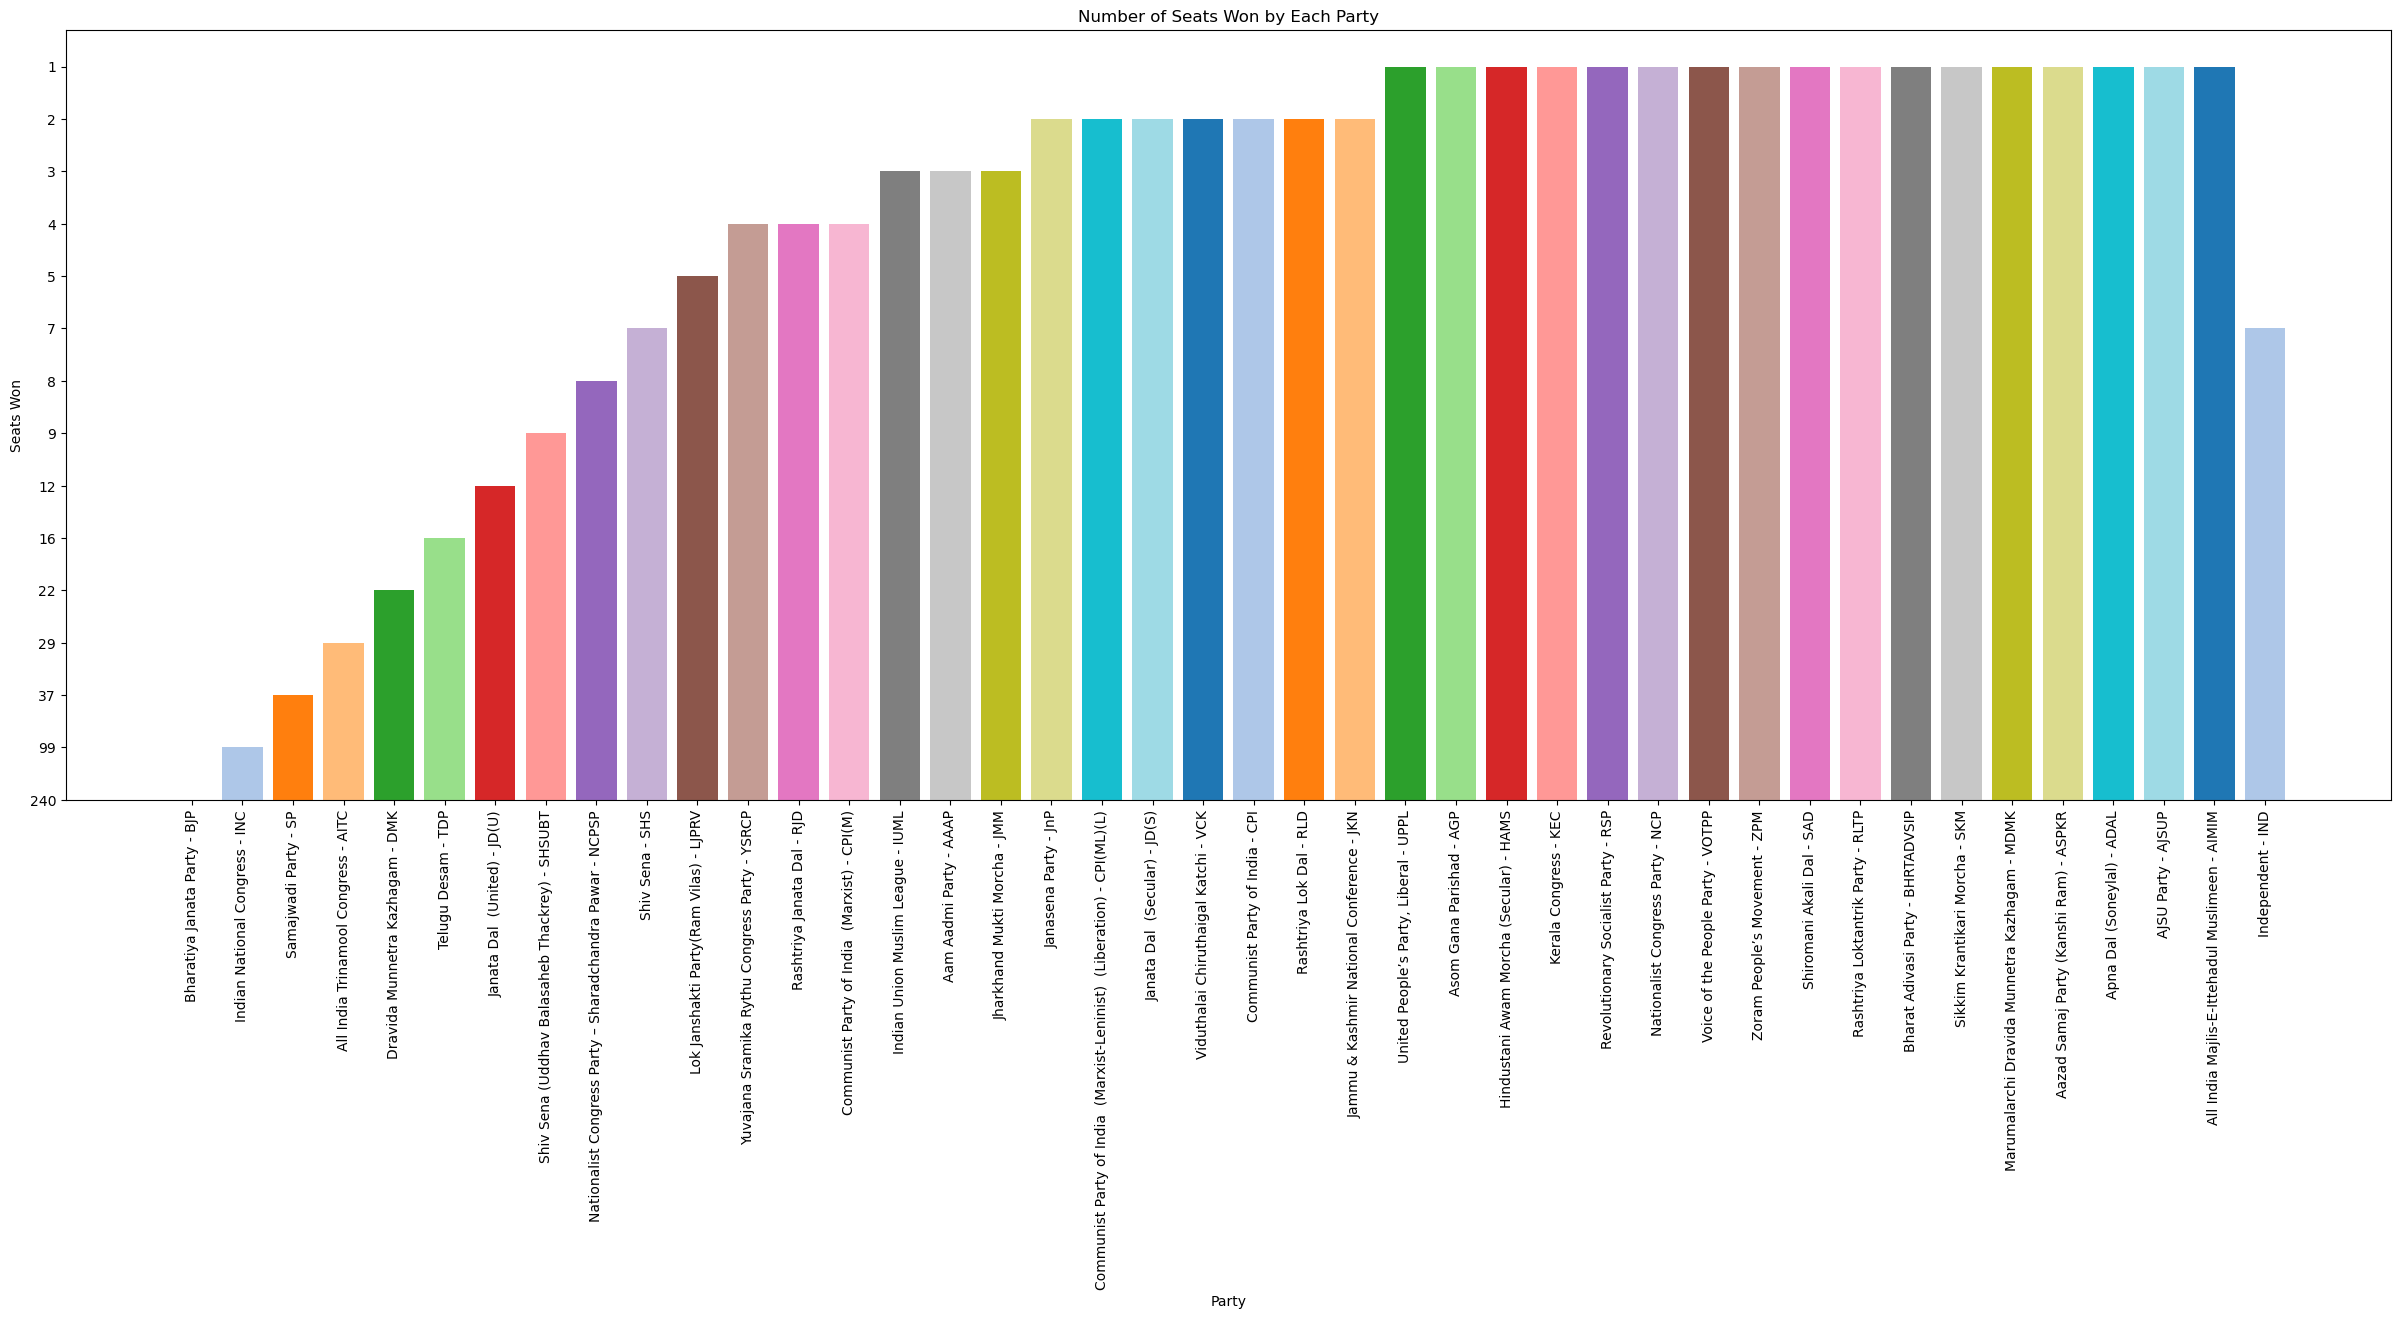

In [84]:
import matplotlib.pyplot as plt

colors = plt.cm.tab20.colors
plt.figure(figsize=(30, 10))
plt.bar(df['Party'], df['Won'], color=colors[:len(df)])
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.title('Number of Seats Won by Each Party')
plt.xticks(rotation=90)
plt.show()



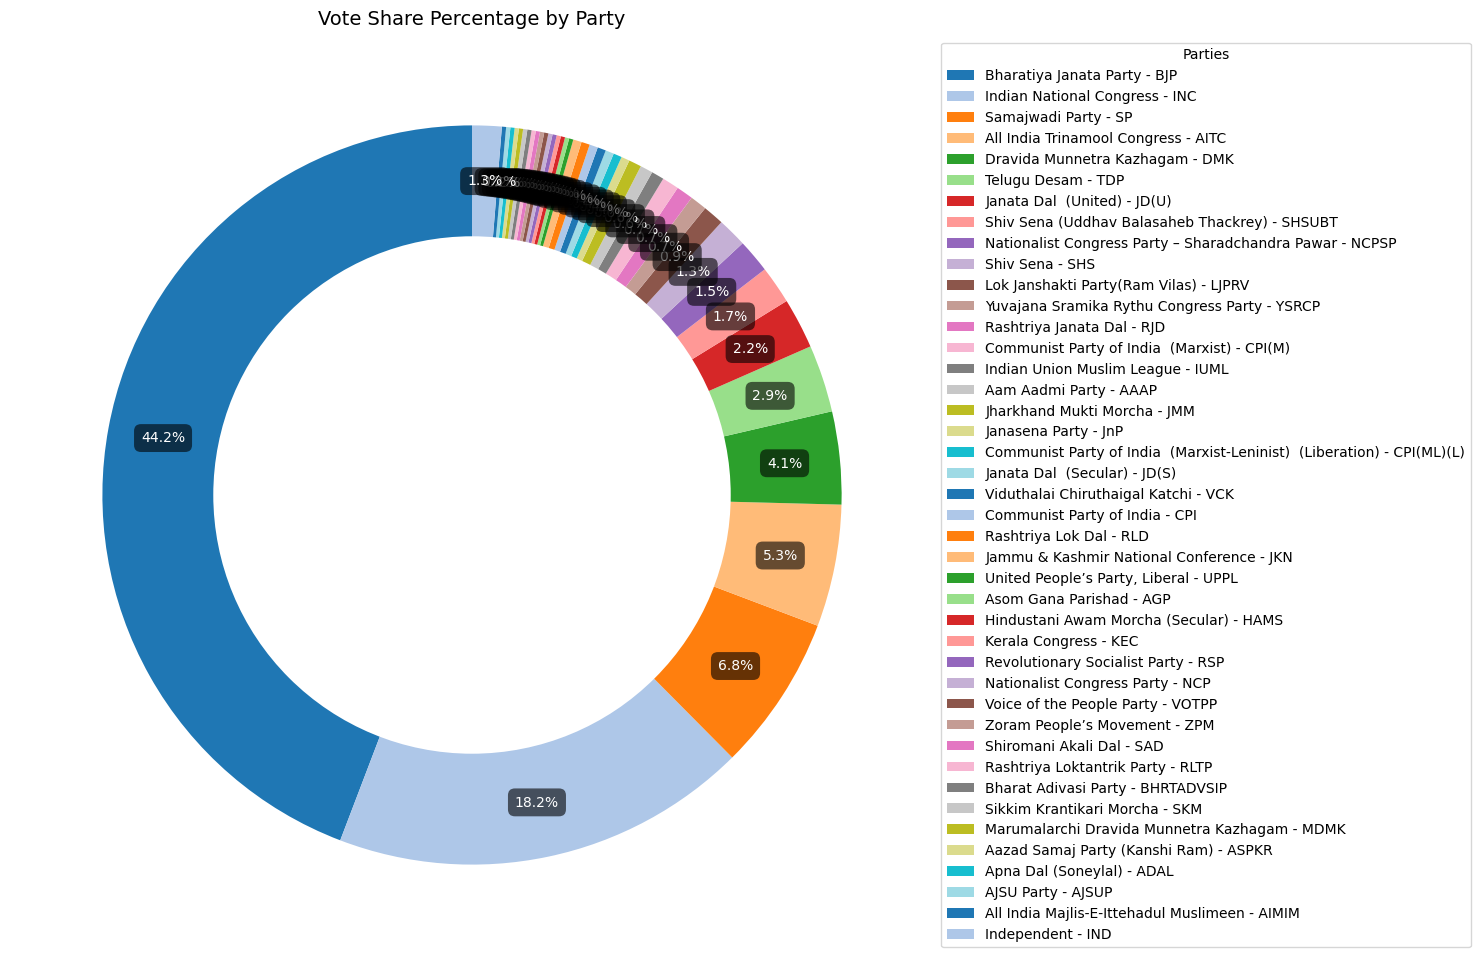

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
wedges, texts, autotexts = plt.pie(df['Won'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=plt.cm.tab20.colors)

for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')
    autotext.set_bbox(dict(facecolor='black', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.5'))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Vote Share Percentage by Party', fontsize=14)

plt.legend(wedges, df['Party'], title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


## Step 1: Data Inspection
#### First, let’s inspect the DataFrame to understand its structure and contents.

In [94]:
print(df.head())

print(df.describe())

print(df.isnull().sum())


                                 Party  Won Leading Total
0         Bharatiya Janata Party - BJP  240       0   240
1       Indian National Congress - INC   99       0    99
2                 Samajwadi Party - SP   37       0    37
3  All India Trinamool Congress - AITC   29       0    29
4      Dravida Munnetra Kazhagam - DMK   22       0    22
                               Party Won Leading Total
count                             42  42      42    42
unique                            42  15       1    15
top     Bharatiya Janata Party - BJP   1       0     1
freq                               1  17      42    17
Party      0
Won        0
Leading    0
Total      0
dtype: int64


## Step 2: Key Insights Extraction

#### Assuming the DataFrame df has columns such as Party, Seats Won, Votes, and other relevant metrics, we can derive insights such as:

#### Total Seats Won by Each Party: Sum the Seats Won for each party.

#### Vote Share Percentage by Each Party: Calculate the percentage of total votes received by each party.

#### Top 5 Parties by Seats Won: Identify the top 5 parties that won the most seats.

#### Top 5 Parties by Vote Share: Identify the top 5 parties by vote share.

#### Correlation between Votes and Seats Won: Analyze the correlation between the number of votes and seats won.

#### Region-wise Performance: If the data includes regional information, analyze the performance of parties in different regions.

#### Winning Margin: Calculate the winning margin for each party (if margin data is available).

#### Number of Parties Participated: Count the total number of parties that participated in the election.

#### Total Votes Cast: Sum the total number of votes cast in the election.

#### Average Votes per Party: Calculate the average number of votes received per party.


In [107]:
if 'Party' in df.columns and 'Won' in df.columns and 'Leading' in df.columns and 'Total' in df.columns:
    
    df['Won'] = df['Won'].astype(int)
    df['Leading'] = df['Leading'].astype(int)
    df['Total'] = df['Total'].astype(int)

    # Total seats won by each party
    total_seats_by_party = df.groupby('Party')['Won'].sum().reset_index()

    # Total seats (Won + Leading) by each party
    total_seats_and_leading_by_party = df.groupby('Party')['Total'].sum().reset_index()

    # Top 5 parties by seats won
    top_5_seats = total_seats_by_party.sort_values(by='Won', ascending=False).head(5)

    # Correlation between seats won and total seats (Won + Leading)
    correlation = df[['Won', 'Total']].astype(float).corr().iloc[0, 1]

    # Number of parties participated
    num_parties = df['Party'].nunique()

    # Total seats won
    total_seats_won = df['Won'].sum()

    # Total seats leading
    total_seats_leading = df['Leading'].sum()

    # Average seats won per party
    avg_seats_won_per_party = total_seats_won / num_parties

    # Average seats leading per party
    avg_seats_leading_per_party = total_seats_leading / num_parties

    report = {
        "Total Seats Won by Each Party": total_seats_by_party,
        "Total Seats (Won + Leading) by Each Party": total_seats_and_leading_by_party,
        "Top 5 Parties by Seats Won": top_5_seats,
        "Correlation between Seats Won and Total Seats (Won + Leading)": correlation,
        "Total Seats Won": total_seats_won,
        "Total Seats Leading": total_seats_leading,
        "Number of Parties Participated": num_parties,
        "Average Seats Won per Party": avg_seats_won_per_party,
        "Average Seats Leading per Party": avg_seats_leading_per_party
    }
    for key, value in report.items():
        print(f"{key}:")
        print(value)
        print("\n")
else:
    print("Required columns are not present in the DataFrame")

Total Seats Won by Each Party:
                                                Party  Won
0                                  AJSU Party - AJSUP    1
1                              Aam Aadmi Party - AAAP    3
2              Aazad Samaj Party (Kanshi Ram) - ASPKR    1
3      All India Majlis-E-Ittehadul Muslimeen - AIMIM    1
4                 All India Trinamool Congress - AITC   29
5                          Apna Dal (Soneylal) - ADAL    1
6                            Asom Gana Parishad - AGP    1
7                   Bharat Adivasi Party - BHRTADVSIP    1
8                        Bharatiya Janata Party - BJP  240
9        Communist Party of India  (Marxist) - CPI(M)    4
10  Communist Party of India  (Marxist-Leninist)  ...    2
11                     Communist Party of India - CPI    2
12                    Dravida Munnetra Kazhagam - DMK   22
13            Hindustani Awam Morcha (Secular) - HAMS    1
14                                  Independent - IND    7
15                     In

In [109]:
with open('election_report.txt', 'w') as f:
    for key, value in report.items():
        f.write(f"{key}:\n{value}\n\n")